# Northwind Traders Data Analysis

### Created by: Alhuda Reza M


# 1. Purpose & Introduction

- Tujuan dari notebook ini adalah untuk melakukan demonstrasi mengenai apa saja yang sudah saya pelajari mengenai data analysis.
- Notebook ini juga sebagai salah satu syarat kelulusan program Data Science & Machine Learning Purwadhika.
- Saya berharap Notebook ini dapat Berguna.

# 2. General Data Information

## 2.1 Context

- Database yang kita gunakan merupakan database dari perusahaan Northwind Traders.
- Perusahaan ini berfokus pada impor dan ekspor Makanan dari seluruh dunia.
- Perusaahaan ingin mengetahui insight mengenai keadaan bisnis yang sedang berjalan

## 2.2 Database Information

Database memiliki 13 Table yang tediri dari :

- orders: terdiri dari transaction details seperti order id, delivery date, delivery location, dll
- employees: terdiri dari employee information seperti id, name, position, date of birth, residential addrees, dll
- employeesterritories: terdiri dari employee id information dan regional id
- territories: terdiri dari id information, dan description area
- region: terdiri dari region id dan region description
- orderdetails: terdiri dari order id, product id, unit price, quanitty, discount
- products: terdiri dari product id, supplier id, category, unit, unit price, amount of stock, number of units in the order, dll
- categories:terdiri dari category id, categoryname, description dan illustration
- suppliers: terdiri dari supplier company name, PIC, PIC position, supplier company address details, telephone number, dll
- customers: terdiri dari nama company pemesan, PIC, PIC position, details of the ordering address, telephone number, dll
- customercuustomerdemo & customerdemographics: (Kosong)
- shippers: terdiri dari shipper id, company name dan phone number

## 2.3 Entity Relationship Diagram

Berikut merupakan Entity Relationship Diagram (ERD):

<img src='Northwind ERD.png'>

## 2.4 Library & Defined Function

### 2.4.1 Library

In [1]:
# to connect SQL with python
import mysql.connector as msc

# general library for data manipulation & data in general
import numpy as np
import pandas as pd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from IPython.display import HTML
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle

# for statistic 
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

# show all columns on pandas dataframe
pd.set_option("display.max_columns", None)

# show all value in columns, wider columns
pd.set_option("max_colwidth", 100)
  
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 2.4.2 Defined Function

In [2]:
# get variable name
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [3]:
# get variable name
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

# usage example
# namestr(df_orders, globals())
# keep the globals

# needed library
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle

# displaying column side by side
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# silahkan fungsi ini di trial. sepertinya masih butuh beberapa penyesuaian
def general_eda(df):
    gen_info = []
    for i in df.columns:
        try : 
            samples = df[i].drop_duplicates(keep = "first").sample(2).values
        except ValueError : 
            samples = df[i].sample().values

        try : 
            calc_std = round(np.std(df[i]), 4)
            calc_var = round(calc_std ** 2,4)
        except TypeError :
            calc_std = "-"
            calc_var = "-"      

        gen_info.append([
            i,
            df[i].dtype,
            calc_std, 
            calc_var,
            df[i].isna().sum(),
            round(((df[i].isna().sum()*100) / df.shape[0]),2), # cek bagian ini untuk lebih tepatnya.
            df[i].nunique(),
            samples])

    gen_info_df = pd.DataFrame(
                    data = gen_info,
                    columns = ["features", "type", "std", "variance", "n_null", "nullpct", "n_unique", "sampledata"])

    general_eda_check_duplicate = pd.DataFrame(df.duplicated().value_counts()).T

    general_eda_check_duplicate.rename(columns = {False : "not_duplicated", True : "duplicated"}, inplace = True)
    display_side_by_side(gen_info_df,general_eda_check_duplicate, titles = [f"General Information for {namestr(df, globals())[0]}", f"Check for Duplicated data {namestr(df, globals())[0]}"])


In [4]:
def col_info_by_index(df, i, figsize = (5, 3)):
    '''
    Giving column index, column name, unique item in that column, value counts and countplot
    
    Input : 
        - df      : the dataframe
        - i       : index column you want to check
        - figsize : by default is set (5, 3), can be adjusted 
        
    '''
    print(f"column index : {i}")
    print(f"column name : {df.columns[i]}")
    print("\nUnique item")
    print(f"{df[df.columns[i]].unique()}")
    print("\nValue Counts")
    df_col_info = pd.DataFrame(df[df.columns[i]].value_counts())
    df_col_info.rename(columns = {f"{df.columns[i]}" : f"n_{df.columns[i]}"}, inplace = True)
    
    plt.figure(figsize = figsize)
    sns.countplot(data = df, x = df[df.columns[i]], palette = "Set2")
    plt.xticks(rotation = 45, ha = "right")
    plt.show()
    
    return df_col_info

In [5]:
def visualize_distribution(df, features) :
    '''
    Understanding column that has numerical value. This function will give statistic descriptive, boxplot, histogram and skew value
    
    Input : 
    - df      : the dataframe
    - feature : feature names         
    
    '''
    print(f"Stats for {features}:")
    display(df[features].describe())
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10,8), 
                                   gridspec_kw = {"height_ratios": (.15, .85), "hspace": 0.05})
    
    ax1.set_title(f"Distribution of {features}", size = 15)
    sns.boxplot(data = df, x = features, ax = ax1)
    ax1.set(xlabel = "")
    ax1.grid()
    
    sns.histplot(data = df, x = features, kde = True, ax = ax2)
    ax2.grid()
    ax2.set_xlabel(f"{features}", size = 12)
    ax2.tick_params(axis = "both", labelsize = 10)
    
    plt.show()

    print(f"Skewness of {features}:", skew(df[features]))

# 3. SQL

Pada Bagian ini kita akan melakukan proses berikut:

- Melakukan koneksi antara Python dan SQL
- Menggunakan CTE atau Windows Function apabila dibutuhkan
- Membuat Table untuk dianalisis

## 3.1 Connecting to MySql Database

In [6]:
# create connection
mydb = msc.connect(host='localhost',
                              user='root',
                              passwd='123456',
                              database ='northwind')
# create access to database
mycursor=mydb.cursor()

# create Function
# Returning Dataframe
def execute_sql(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    df = pd.DataFrame(result , columns= mycursor.column_names)
    return df

In [7]:
# trial
execute_sql('''
show tables;''')

Tables_in_northwind
0             categories
1   customercustomerdemo
2   customerdemographics
3              customers
4              employees
5    employeeterritories
6           orderdetails
7                 orders
8               products
9                 region
10              shippers
11             suppliers
12           territories

## 3.2 Table Interpretation

Fokus dari analisis kita saat ini adalah table `orders`, sebelum itu kita akan menggabungkan table-table yang lain untuk mendapatkan informasi secara penuh.

### CATEGORIES TABLE

In [8]:
categories_df = execute_sql('''
SELECT * FROM categories;
''')
categories_df.head()

CategoryID    CategoryName  \
0           1       Beverages   
1           2      Condiments   
2           3     Confections   
3           4  Dairy Products   
4           5  Grains/Cereals   

                                                  Description  \
0                 Soft drinks, coffees, teas, beers, and ales   
1  Sweet and savory sauces, relishes, spreads, and seasonings   
2                         Desserts, candies, and sweet breads   
3                                                     Cheeses   
4                         Breads, crackers, pasta, and cereal   

                                                                                               Picture  
0  b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B7900010004000000500000FFEE002641646F62...  
1  b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B79000100040000004C0000FFEE002641646F62...  
2  b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B7900010004000000410000FFEE002641646F62...  
3  b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B7900010004000000500000FFEE002641646F62...  
4  b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B79000100040000004C0000FFEE002641646F62...

### ORDERS TABLE

In [9]:
orders_df = execute_sql('''
SELECT * FROM orders;
''')
orders_df.head()

OrderID CustomerID  EmployeeID  OrderDate RequiredDate ShippedDate  \
0    10248      VINET           5 1996-07-04   1996-08-01  1996-07-16   
1    10249      TOMSP           6 1996-07-05   1996-08-16  1996-07-10   
2    10250      HANAR           4 1996-07-08   1996-08-05  1996-07-12   
3    10251      VICTE           3 1996-07-08   1996-08-05  1996-07-15   
4    10252      SUPRD           4 1996-07-09   1996-08-06  1996-07-11   

   ShipVia  Freight                   ShipName           ShipAddress  \
0        3  32.3800  Vins et alcools Chevalier    59 rue de l-Abbaye   
1        1  11.6100          Toms Spezialitten         Luisenstr. 48   
2        2  65.8300              Hanari Carnes        Rua do Pao, 67   
3        1  41.3400       Victuailles en stock    2, rue du Commerce   
4        2  51.3000             Suprmes dlices  Boulevard Tirou, 255   

         ShipCity ShipRegion ShipPostalCode ShipCountry  
0           Reims       None          51100      France  
1          Mnster       None          44087     Germany  
2  Rio de Janeiro         RJ      05454-876      Brazil  
3            Lyon       None          69004      France  
4       Charleroi       None         B-6000     Belgium

### ORDER DETAILS TABLE

In [10]:
order_details_df = execute_sql('''
SELECT * FROM orderdetails;
''')
order_details_df.head()

OrderID  ProductID UnitPrice  Quantity  Discount
0    10248         11   14.0000        12       0.0
1    10248         42    9.8000        10       0.0
2    10248         72   34.8000         5       0.0
3    10249         14   18.6000         9       0.0
4    10249         51   42.4000        40       0.0

### PRODUCTS TABLE

In [11]:
products_df = execute_sql('''
SELECT * FROM products;
''')
products_df.head()

ProductID                   ProductName  SupplierID  CategoryID  \
0          1                          Chai           1           1   
1          2                         Chang           1           1   
2          3                 Aniseed Syrup           1           2   
3          4  Chef Anton's Cajun Seasoning           2           2   
4          5        Chef Anton's Gumbo Mix           2           2   

       QuantityPerUnit UnitPrice  UnitsInStock  UnitsOnOrder  ReorderLevel  \
0   10 boxes x 20 bags   18.0000            39             0            10   
1   24 - 12 oz bottles   19.0000            17            40            25   
2  12 - 550 ml bottles   10.0000            13            70            25   
3       48 - 6 oz jars   22.0000            53             0             0   
4             36 boxes   21.3500             0             0             0   

   Discontinued  
0             0  
1             0  
2             0  
3             0  
4             1

### CUSTOMERS TABLE

In [12]:
customers_df = execute_sql('''
SELECT * FROM customers;
''')
customers_df.head()

CustomerID                         CompanyName         ContactName  \
0      ALFKI                 Alfreds Futterkiste        Maria Anders   
1      ANATR  Ana Trujillo Emparedados y helados        Ana Trujillo   
2      ANTON              Antonio Moreno Taquera      Antonio Moreno   
3      AROUT                     Around the Horn        Thomas Hardy   
4      BERGS                   Berglunds snabbkp  Christina Berglund   

           ContactTitle                       Address        City Region  \
0  Sales Representative                 Obere Str. 57      Berlin   None   
1                 Owner  Avda. de la Constitucin 2222  Mxico D.F.   None   
2                 Owner               Mataderos  2312  Mxico D.F.   None   
3  Sales Representative               120 Hanover Sq.      London   None   
4   Order Administrator                Berguvsvgen  8        Lule   None   

  PostalCode  Country           Phone             Fax  
0      12209  Germany     030-0074321     030-0076545  
1      05021   Mexico    (5) 555-4729    (5) 555-3745  
2      05023   Mexico    (5) 555-3932            None  
3    WA1 1DP       UK  (171) 555-7788  (171) 555-6750  
4   S-958 22   Sweden   0921-12 34 65   0921-12 34 67

### SUPPLIERS TABLE

In [13]:
suppliers_df = execute_sql('''
SELECT * FROM suppliers;
''')
suppliers_df.head()

SupplierID                         CompanyName  \
0           1                      Exotic Liquids   
1           2          New Orleans Cajun Delights   
2           3           Grandma Kelly's Homestead   
3           4                       Tokyo Traders   
4           5  Cooperativa de Quesos 'Las Cabras'   

                   ContactName          ContactTitle  \
0             Charlotte Cooper    Purchasing Manager   
1                Shelley Burke   Order Administrator   
2                Regina Murphy  Sales Representative   
3                 Yoshi Nagase     Marketing Manager   
4  Antonio del Valle Saavedra   Export Administrator   

                        Address         City    Region PostalCode Country  \
0                49 Gilbert St.       London      None    EC1 4SD      UK   
1                P.O. Box 78934  New Orleans        LA      70117     USA   
2                707 Oxford Rd.    Ann Arbor        MI      48104     USA   
3  9-8 Sekimai\r\nMusashino-shi        Tokyo      None        100   Japan   
4             Calle del Rosal 4       Oviedo  Asturias      33007   Spain   

            Phone             Fax     HomePage  
0  (171) 555-2222            None         None  
1  (100) 555-4822            None  #CAJUN.HTM#  
2  (313) 555-5735  (313) 555-3349         None  
3  (03) 3555-5011            None         None  
4  (98) 598 76 54            None         None

## 3.3 Table Creation

Berdasarkan hasil analisis dari tabel diatas berikut merupakan kolom apa saja yang akan kita gunakan:
- orders:  OrderID, OrderDate, RequiredDate, ShippedDate, ShipCity, ShipRegion, ShipCountry
- order detail : OrderID, ProductID, UnitPrice, Quantity, Discount
- categories : CategoryID, CategoryName, Description
- customer : companyname
- products : ProductID, ProductName, CategoryID, UnitPrice, UnitsInStock, UnitsOnOrder, ReorderLevel, Discontinued
- shippers : companyname
- suppliers : companyname

In [14]:
df = execute_sql('''
SELECT  o.orderid, cust.companyname AS customer_companyname,
        p.productname,
        cat.categoryname, cat.description,
        o.orderdate, o.requireddate, o.shippeddate, o.shipcity, o.shipregion, o.shipcountry, o.freight,
        odtl.unitprice, odtl.quantity, odtl.discount,
        p.unitsinstock, p.unitsonorder, p.reorderlevel, p.discontinued,
        shp.CompanyName AS ExpeditionService,
        sup.CompanyName AS supplier_companyname, 
        sup.Country AS supplier_country
FROM orders o
LEFT JOIN orderdetails odtl
USING (orderid)
LEFT JOIN products p
USING (productid)
LEFT JOIN categories cat
USING (categoryid)
LEFT JOIN customers cust
USING(CustomerID)
LEFT JOIN shippers shp
ON o.ShipVia = shp.ShipperID
LEFT JOIN suppliers sup
USING (SupplierID);
''')

In [15]:
df.head()

orderid       customer_companyname                    productname  \
0    10248  Vins et alcools Chevalier                 Queso Cabrales   
1    10248  Vins et alcools Chevalier  Singaporean Hokkien Fried Mee   
2    10248  Vins et alcools Chevalier         Mozzarella di Giovanni   
3    10249          Toms Spezialitten                           Tofu   
4    10249          Toms Spezialitten          Manjimup Dried Apples   

     categoryname                          description  orderdate  \
0  Dairy Products                              Cheeses 1996-07-04   
1  Grains/Cereals  Breads, crackers, pasta, and cereal 1996-07-04   
2  Dairy Products                              Cheeses 1996-07-04   
3         Produce            Dried fruit and bean curd 1996-07-05   
4         Produce            Dried fruit and bean curd 1996-07-05   

  requireddate shippeddate shipcity shipregion shipcountry  freight unitprice  \
0   1996-08-01  1996-07-16    Reims       None      France  32.3800   14.0000   
1   1996-08-01  1996-07-16    Reims       None      France  32.3800    9.8000   
2   1996-08-01  1996-07-16    Reims       None      France  32.3800   34.8000   
3   1996-08-16  1996-07-10   Mnster       None     Germany  11.6100   18.6000   
4   1996-08-16  1996-07-10   Mnster       None     Germany  11.6100   42.4000   

   quantity  discount  unitsinstock  unitsonorder  reorderlevel  discontinued  \
0        12       0.0            22            30            30             0   
1        10       0.0            26             0             0             1   
2         5       0.0            14             0             0             0   
3         9       0.0            35             0             0             0   
4        40       0.0            20             0            10             0   

  ExpeditionService                supplier_companyname supplier_country  
0  Federal Shipping  Cooperativa de Quesos 'Las Cabras'            Spain  
1  Federal Shipping                        Leka Trading        Singapore  
2  Federal Shipping             Formaggi Fortini s.r.l.            Italy  
3    Speedy Express                            Mayumi's            Japan  
4    Speedy Express                         G'day, Mate        Australia

## 3.4 Windows Function and CTE

- asumsi awal saya seiring berjalannya waktu akan terjadi peningkatan harga product pada table yang diberikan.
- untuk memastikan hal ini saya akan menggunakan query untuk menguji asumsi tersebut.
- Saya akan melakukan implementasi CTE Function dan Window Function untuk menguji asumsi yang saya ajukan.

In [16]:
execute_sql('''
WITH step_1 AS(
SELECT  o.orderid,
        o.requireddate,
        p.productname,
        cat.categoryname,
        odtl.unitprice AS odtl_unitprice,
        p.unitprice AS prodcat_unitprice
FROM orders o
LEFT JOIN orderdetails odtl
USING (orderid)
LEFT JOIN products p
USING (productid)
LEFT JOIN categories cat
USING (categoryid)
),
step_2 AS(
SELECT  orderid,
        requireddate,
        productname,
        categoryname,
        ROW_NUMBER() OVER(PARTITION BY categoryname) AS row_number_cat,                          
        ROUND(odtl_unitprice,3) AS odtl_unitprice,
        ROUND(MIN(odtl_unitprice) OVER(PARTITION BY productname),3) AS min_odtl_unit_price,      
        ROUND(MAX(odtl_unitprice) OVER(PARTITION BY productname),3) AS max_odtl_unit_price,      
        ROUND(AVG(odtl_unitprice) OVER(PARTITION BY productname),3) AS avg_odtl_unit_price,      
        ROUND(prodcat_unitprice,3) AS prodcat_unitprice
FROM step_1
)
SELECT  orderid,
        requireddate,
        productname,
        categoryname,
        row_number_cat,                         
        odtl_unitprice,
        max_odtl_unit_price,     
        min_odtl_unit_price,
        avg_odtl_unit_price,
        prodcat_unitprice
FROM step_2
WHERE productname = "Tofu"
LIMIT 20;
''')

orderid requireddate productname categoryname  row_number_cat  \
0     10249   1996-08-16        Tofu      Produce               1   
1     10325   1996-10-23        Tofu      Produce              12   
2     10333   1996-11-15        Tofu      Produce              13   
3     10375   1997-01-03        Tofu      Produce              19   
4     10393   1997-01-22        Tofu      Produce              25   
5     10409   1997-02-06        Tofu      Produce              28   
6     10412   1997-02-10        Tofu      Produce              29   
7     10427   1997-02-24        Tofu      Produce              31   
8     10474   1997-04-10        Tofu      Produce              39   
9     10503   1997-05-09        Tofu      Produce              46   
10    10555   1997-06-30        Tofu      Produce              54   
11    10571   1997-07-29        Tofu      Produce              59   
12    10580   1997-07-24        Tofu      Produce              60   
13    10623   1997-09-04        Tofu      Produce              63   
14    10625   1997-09-05        Tofu      Produce              65   
15    10656   1997-10-02        Tofu      Produce              70   
16    10675   1997-10-17        Tofu      Produce              73   
17    10733   1997-12-05        Tofu      Produce              79   
18    10750   1997-12-19        Tofu      Produce              82   
19    10794   1998-01-21        Tofu      Produce              89   

   odtl_unitprice max_odtl_unit_price min_odtl_unit_price avg_odtl_unit_price  \
0          18.600              23.250              18.600              21.348   
1          18.600              23.250              18.600              21.348   
2          18.600              23.250              18.600              21.348   
3          18.600              23.250              18.600              21.348   
4          18.600              23.250              18.600              21.348   
5          18.600              23.250              18.600              21.348   
6          18.600              23.250              18.600              21.348   
7          18.600              23.250              18.600              21.348   
8          18.600              23.250              18.600              21.348   
9          23.250              23.250              18.600              21.348   
10         23.250              23.250              18.600              21.348   
11         23.250              23.250              18.600              21.348   
12         23.250              23.250              18.600              21.348   
13         23.250              23.250              18.600              21.348   
14         23.250              23.250              18.600              21.348   
15         23.250              23.250              18.600              21.348   
16         23.250              23.250              18.600              21.348   
17         23.250              23.250              18.600              21.348   
18         23.250              23.250              18.600              21.348   
19         23.250              23.250              18.600              21.348   

   prodcat_unitprice  
0             23.250  
1             23.250  
2             23.250  
3             23.250  
4             23.250  
5             23.250  
6             23.250  
7             23.250  
8             23.250  
9             23.250  
10            23.250  
11            23.250  
12            23.250  
13            23.250  
14            23.250  
15            23.250  
16            23.250  
17            23.250  
18            23.250  
19            23.250

- Berdasarkan Table diatas ternyata asumsi kita benar. Pada Kolom `odtl_unitprice` terdapat peningkatan harga.
- Peningkatan data ini terjadi karena table product selalu diupdate secara periodik.

# 4. Data Cleaning and Exploration

Pada Bagian kali ini kita akan menghandle anomali-anomali yang ada pada data, seperti:

- Data Duplikat
- Missing values
- wrong formating

## 4.1 Attribute Information

Membuat Backup Data.

In [17]:
df_eda = df.copy()

In [18]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   orderid               2155 non-null   int64         
 1   customer_companyname  2155 non-null   object        
 2   productname           2155 non-null   object        
 3   categoryname          2155 non-null   object        
 4   description           2155 non-null   object        
 5   orderdate             2155 non-null   datetime64[ns]
 6   requireddate          2155 non-null   datetime64[ns]
 7   shippeddate           2082 non-null   datetime64[ns]
 8   shipcity              2155 non-null   object        
 9   shipregion            856 non-null    object        
 10  shipcountry           2155 non-null   object        
 11  freight               2155 non-null   object        
 12  unitprice             2155 non-null   object        
 13  quantity          

In [19]:
general_eda(df_eda)

General Information for df_eda 
 
 
 
 features 
 type 
 std 
 variance 
 n_null 
 nullpct 
 n_unique 
 sampledata 
 
 
 
 
 0 
 orderid 
 int64 
 241.322 
 58236.3077 
 0 
 0.00 
 830 
 [11075, 10551] 
 
 
 1 
 customer_companyname 
 object 
 - 
 - 
 0 
 0.00 
 89 
 [Bon app', Consolidated Holdings] 
 
 
 2 
 productname 
 object 
 - 
 - 
 0 
 0.00 
 77 
 [Chai, Tunnbrd] 
 
 
 3 
 categoryname 
 object 
 - 
 - 
 0 
 0.00 
 8 
 [Produce, Meat/Poultry] 
 
 
 4 
 description 
 object 
 - 
 - 
 0 
 0.00 
 8 
 [Seaweed and fish, Prepared meats] 
 
 
 5 
 orderdate 
 datetime64[ns] 
 - 
 - 
 0 
 0.00 
 480 
 [1997-04-14T00:00:00.000000000, 1996-12-20T00:00:00.000000000] 
 
 
 6 
 requireddate 
 datetime64[ns] 
 - 
 - 
 0 
 0.00 
 454 
 [1996-08-08T00:00:00.000000000, 1998-01-05T00:00:00.000000000] 
 
 
 7 
 shippeddate 
 datetime64[ns] 
 - 
 - 
 73 
 3.39 
 387 
 [1996-12-31T00:00:00.000000000, 1997-07-18T00:00:00.000000000] 
 
 
 8 
 shipcity 
 object 
 - 
 - 
 0 
 0.00 
 70 
 [Stavern, Seattle] 
 
 
 9 
 shipregion 
 object 
 - 
 - 
 1299 
 60.28 
 19 
 [None, DF] 
 
 
 10 
 shipcountry 
 object 
 - 
 - 
 0 
 0.00 
 21 
 [Portugal, Argentina] 
 
 
 11 
 freight 
 object 
 - 
 - 
 0 
 0.00 
 799 
 [60.1800, 0.9400] 
 
 
 12 
 unitprice 
 object 
 - 
 - 
 0 
 0.00 
 116 
 [12.0000, 13.6000] 
 
 
 13 
 quantity 
 int64 
 19.0176 
 361.6691 
 0 
 0.00 
 55 
 [60, 66] 
 
 
 14 
 discount 
 float64 
 0.0 
 0.0 
 0 
 0.00 
 1 
 [0.0] 
 
 
 15 
 unitsinstock 
 int64 
 36.0473 
 1299.4078 
 0 
 0.00 
 51 
 [53, 0] 
 
 
 16 
 unitsonorder 
 int64 
 19.7444 
 389.8413 
 0 
 0.00 
 10 
 [80, 70] 
 
 
 17 
 reorderlevel 
 int64 
 10.7889 
 116.4004 
 0 
 0.00 
 7 
 [5, 25] 
 
 
 18 
 discontinued 
 int64 
 0.3076 
 0.0946 
 0 
 0.00 
 2 
 [1, 0] 
 
 
 19 
 ExpeditionService 
 object 
 - 
 - 
 0 
 0.00 
 3 
 [Speedy Express, Federal Shipping] 
 
 
 20 
 supplier_companyname 
 object 
 - 
 - 
 0 
 0.00 
 29 
 [Cooperativa de Quesos 'Las Cabras', Refrescos Americanas LTDA] 
 
 
 21 
 supplier_country 
 object 
 - 
 - 
 0 
 0.00 
 17 
 [USA, Australia] 
 
 
 Check for Duplicated data df_eda 
 
 
 
 not_duplicated 
 
 
 
 
 0 
 2155

In [20]:
df_eda.describe()

orderid     quantity  discount  unitsinstock  unitsonorder  \
count   2155.000000  2155.000000    2155.0   2155.000000   2155.000000   
mean   10659.375870    23.812993       0.0     39.795824      8.074246   
std      241.378032    19.022047       0.0     36.055668     19.748983   
min    10248.000000     1.000000       0.0      0.000000      0.000000   
25%    10451.000000    10.000000       0.0     17.000000      0.000000   
50%    10657.000000    20.000000       0.0     25.000000      0.000000   
75%    10862.500000    30.000000       0.0     57.000000      0.000000   
max    11077.000000   130.000000       0.0    125.000000    100.000000   

       reorderlevel  discontinued  
count   2155.000000   2155.000000  
mean      11.900232      0.105800  
std       10.791421      0.307653  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%       10.000000      0.000000  
75%       20.000000      0.000000  
max       30.000000      1.000000

Melihat distribusi data numerical.

In [21]:
df_eda.describe()

orderid     quantity  discount  unitsinstock  unitsonorder  \
count   2155.000000  2155.000000    2155.0   2155.000000   2155.000000   
mean   10659.375870    23.812993       0.0     39.795824      8.074246   
std      241.378032    19.022047       0.0     36.055668     19.748983   
min    10248.000000     1.000000       0.0      0.000000      0.000000   
25%    10451.000000    10.000000       0.0     17.000000      0.000000   
50%    10657.000000    20.000000       0.0     25.000000      0.000000   
75%    10862.500000    30.000000       0.0     57.000000      0.000000   
max    11077.000000   130.000000       0.0    125.000000    100.000000   

       reorderlevel  discontinued  
count   2155.000000   2155.000000  
mean      11.900232      0.105800  
std       10.791421      0.307653  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%       10.000000      0.000000  
75%       20.000000      0.000000  
max       30.000000      1.000000

## 4.2 Data Cleaning

### Mengubah Data Type, Missing value dan Anomaly lainnya

- unitprice merupakan tipe data object yang akan kita ubah menjadi tipe data numeric
- freight merupakan tipe data object yang akan kita ubah menjadi tipe data numeric
- Kolom Discount yang hanya bernilai 0
- berdasarkan deskripsi data sebelumnya data tidak memiliki duplicate

In [22]:
# Changing data type
df_eda["unitprice"] = pd.to_numeric(df_eda["unitprice"])
df_eda["freight"] = pd.to_numeric(df_eda["freight"])

# Drop discount column
df_eda.drop(columns = ["discount"], inplace = True)

- kita memiliki 2 kolom yang memiliki missing value (shipregion and shippeddate) hal yang akan dilakukan adalah:
    - melakukan drop pada seluruh kolom `shipregion` karena presentasi data yang null besar (60.28%).
    - melakukan drop pada kolom yang kosong saja pada kolom `shippeddate`.


In [23]:
# Drop shipregion column
df_eda.drop("shipregion", axis = 1, inplace = True)

# Drop all rows of data where shippeddate is missing
df_eda.dropna(subset = ["shippeddate"], inplace = True)

berikut merupakan data yang sudah dibersihkan.

In [24]:
general_eda(df_eda)

General Information for df_eda 
 
 
 
 features 
 type 
 std 
 variance 
 n_null 
 nullpct 
 n_unique 
 sampledata 
 
 
 
 
 0 
 orderid 
 int64 
 233.0663 
 54319.9002 
 0 
 0.0 
 809 
 [10673, 10830] 
 
 
 1 
 customer_companyname 
 object 
 - 
 - 
 0 
 0.0 
 89 
 [Frankenversand, Trail's Head Gourmet Provisioners] 
 
 
 2 
 productname 
 object 
 - 
 - 
 0 
 0.0 
 77 
 [Tourtire, Raclette Courdavault] 
 
 
 3 
 categoryname 
 object 
 - 
 - 
 0 
 0.0 
 8 
 [Dairy Products, Condiments] 
 
 
 4 
 description 
 object 
 - 
 - 
 0 
 0.0 
 8 
 [Seaweed and fish, Dried fruit and bean curd] 
 
 
 5 
 orderdate 
 datetime64[ns] 
 - 
 - 
 0 
 0.0 
 478 
 [1996-12-10T00:00:00.000000000, 1997-09-04T00:00:00.000000000] 
 
 
 6 
 requireddate 
 datetime64[ns] 
 - 
 - 
 0 
 0.0 
 450 
 [1998-04-22T00:00:00.000000000, 1996-12-25T00:00:00.000000000] 
 
 
 7 
 shippeddate 
 datetime64[ns] 
 - 
 - 
 0 
 0.0 
 387 
 [1996-12-04T00:00:00.000000000, 1997-01-15T00:00:00.000000000] 
 
 
 8 
 shipcity 
 object 
 - 
 - 
 0 
 0.0 
 70 
 [Sao Paulo, Barquisimeto] 
 
 
 9 
 shipcountry 
 object 
 - 
 - 
 0 
 0.0 
 21 
 [Ireland, Denmark] 
 
 
 10 
 freight 
 float64 
 134.4392 
 18073.8985 
 0 
 0.0 
 779 
 [47.3, 21.18] 
 
 
 11 
 unitprice 
 float64 
 30.2171 
 913.0731 
 0 
 0.0 
 116 
 [20.0, 27.2] 
 
 
 12 
 quantity 
 int64 
 18.8855 
 356.6621 
 0 
 0.0 
 54 
 [42, 14] 
 
 
 13 
 unitsinstock 
 int64 
 36.0537 
 1299.8693 
 0 
 0.0 
 51 
 [101, 65] 
 
 
 14 
 unitsonorder 
 int64 
 19.5647 
 382.7775 
 0 
 0.0 
 10 
 [100, 70] 
 
 
 15 
 reorderlevel 
 int64 
 10.8015 
 116.6724 
 0 
 0.0 
 7 
 [5, 0] 
 
 
 16 
 discontinued 
 int64 
 0.308 
 0.0949 
 0 
 0.0 
 2 
 [0, 1] 
 
 
 17 
 ExpeditionService 
 object 
 - 
 - 
 0 
 0.0 
 3 
 [Federal Shipping, United Package] 
 
 
 18 
 supplier_companyname 
 object 
 - 
 - 
 0 
 0.0 
 29 
 [Nord-Ost-Fisch Handelsgesellschaft mbH, Formaggi Fortini s.r.l.] 
 
 
 19 
 supplier_country 
 object 
 - 
 - 
 0 
 0.0 
 17 
 [Singapore, Italy] 
 
 
 Check for Duplicated data df_eda 
 
 
 
 not_duplicated 
 
 
 
 
 0 
 2082

# 4.3 Explore Each Column

Pada bagian kali ini saya hanya akan melakukan eksplorasi pada kolom yang dirasa penting saja.

column index : 3
column name : categoryname

Unique item
['Dairy Products' 'Grains/Cereals' 'Produce' 'Seafood' 'Condiments'
 'Confections' 'Beverages' 'Meat/Poultry']

Value Counts


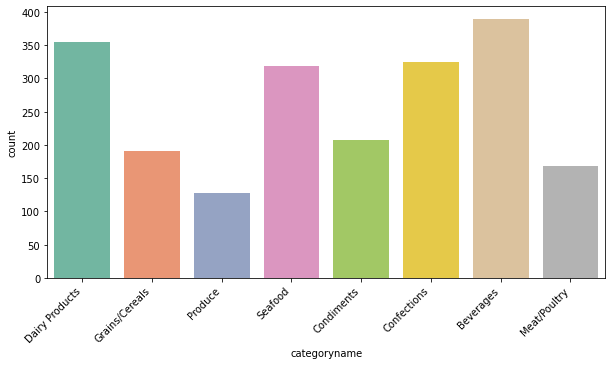

n_categoryname
Beverages                  389
Dairy Products             355
Confections                324
Seafood                    319
Condiments                 207
Grains/Cereals             191
Meat/Poultry               169
Produce                    128

In [25]:
col_info_by_index(df_eda, 3, figsize = (10,5))

- Data Tidak menunjukan adanya anomaly

column index : 8
column name : shipcity

Unique item
['Reims' 'Mnster' 'Rio de Janeiro' 'Lyon' 'Charleroi' 'Bern' 'Genve'
 'Resende' 'San Cristbal' 'Graz' 'Mxico D.F.' 'Kln' 'Albuquerque' 'Brcke'
 'Strasbourg' 'Oulu' 'Mnchen' 'Caracas' 'Seattle' 'Lander' 'Cunewalde'
 'Bergamo' 'Leipzig' 'Lule' 'Frankfurt a.M.' 'Madrid' 'Barquisimeto'
 'Reggio Emilia' 'London' 'Sao Paulo' 'Cork' 'Stuttgart' 'Sevilla'
 'Anchorage' 'Portland' 'Nantes' 'Cowes' 'Brandenburg' 'Boise' 'Lisboa'
 'Marseille' 'Montral' 'Kobenhavn' 'Toulouse' 'Salzburg' 'Colchester'
 'Aachen' 'Barcelona' 'rhus' 'Warszawa' 'Elgin' 'Stavern' 'Tsawassen'
 'I. de Margarita' 'Lille' 'Buenos Aires' 'Torino' 'Campinas'
 'Walla Walla' 'Vancouver' 'Mannheim' 'Eugene' 'Bruxelles' 'Kirkland'
 'San Francisco' 'Helsinki' 'Butte' 'Berlin' 'Paris' 'Versailles']

Value Counts


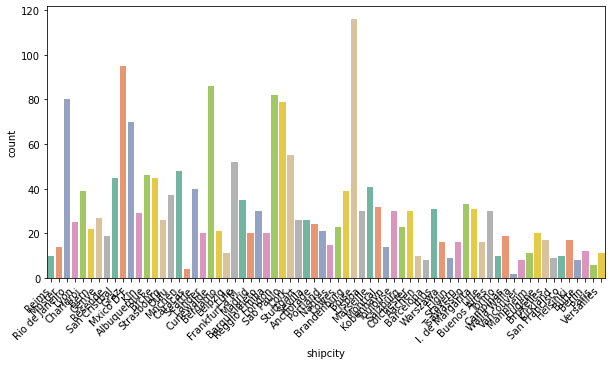

n_shipcity
Boise                  116
Graz                    95
Cunewalde               86
London                  82
Rio de Janeiro          80
...                    ...
Barcelona                8
Butte                    8
Paris                    6
Caracas                  4
Walla Walla              2

[70 rows x 1 columns]

In [26]:
col_info_by_index(df_eda, 8, figsize = (10,5))

Berdasarkan informasi, didapat beberapa data yang Typo dan terjadi secara konsisten, sebagai berikut:

- Mnchen, merupakan Munchen
- Mnster, merupakan Manchester

Sehingga Saya memutuskan untuk mengubah data tersebut menjadi lebih jelas dan konsisten.

In [27]:
df_eda["shipcity"].replace("Mnchen", "Munchen", inplace = True)
df_eda["shipcity"].replace("Mnster", "Munster", inplace = True)
df_eda["shipcity"].replace("Mxico D.F.", "Mexico D.F.", inplace = True)

Stats for unitprice:


count    2082.000000
mean       26.379500
std        30.224352
min         2.000000
25%        12.000000
50%        18.400000
75%        32.000000
max       263.500000
Name: unitprice, dtype: float64

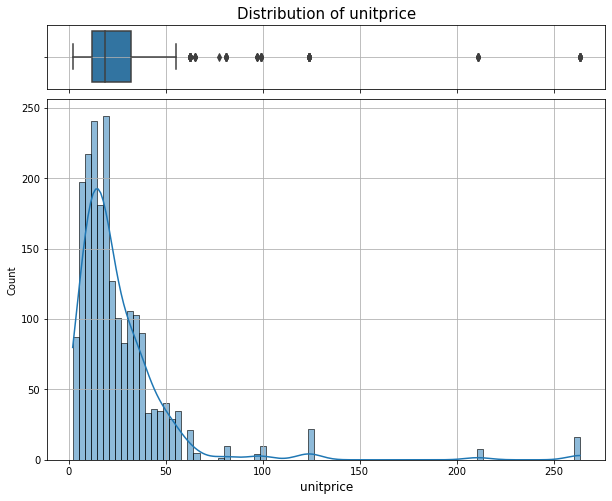

Skewness of unitprice: 5.055406591682567


In [28]:
visualize_distribution(df_eda, df_eda.columns[11])

- Berdasarkan Distribution Plot dan Skewness, data freight tidak terdistirbusi normal.
- Dan juga terdapat Outlier yang akan kita eksplor lebih lanjut.

In [29]:
expensive_product = df_eda[df_eda["unitprice"] > 150]["productname"].unique()
expensive_product

array(['Cte de Blaye'], dtype=object)

In [30]:
df_eda[df_eda["productname"] == "Cte de Blaye"]

orderid        customer_companyname   productname categoryname  \
218     10329       Split Rail Beer & Ale  Cte de Blaye    Beverages   
274     10351                Ernst Handel  Cte de Blaye    Beverages   
281     10353            Piccolo und mehr  Cte de Blaye    Beverages   
300     10360     Blondesddsl pre et fils  Cte de Blaye    Beverages   
331     10372               Queen Cozinha  Cte de Blaye    Beverages   
449     10417               Simons bistro  Cte de Blaye    Beverages   
471     10424               Mre Paillarde  Cte de Blaye    Beverages   
613     10479  Rattlesnake Canyon Grocery  Cte de Blaye    Beverages   
713     10518         Tortuga Restaurante  Cte de Blaye    Beverages   
782     10540                  QUICK-Stop  Cte de Blaye    Beverages   
785     10541               Hanari Carnes  Cte de Blaye    Beverages   
971     10616     Great Lakes Food Market  Cte de Blaye    Beverages   
1115    10672           Berglunds snabbkp  Cte de Blaye    Beverages   
1403    10783               Hanari Carnes  Cte de Blaye    Beverages   
1459    10805              The Big Cheese  Cte de Blaye    Beverages   
1483    10816     Great Lakes Food Market  Cte de Blaye    Beverages   
1486    10817              Kniglich Essen  Cte de Blaye    Beverages   
1511    10828               Rancho grande  Cte de Blaye    Beverages   
1522    10831                Sant Gourmet  Cte de Blaye    Beverages   
1620    10865                  QUICK-Stop  Cte de Blaye    Beverages   
1678    10889  Rattlesnake Canyon Grocery  Cte de Blaye    Beverages   
1855    10964          Spcialits du monde  Cte de Blaye    Beverages   
1893    10981               Hanari Carnes  Cte de Blaye    Beverages   
2027    11032        White Clover Markets  Cte de Blaye    Beverages   

                                      description  orderdate requireddate  \
218   Soft drinks, coffees, teas, beers, and ales 1996-10-15   1996-11-26   
274   Soft drinks, coffees, teas, beers, and ales 1996-11-11   1996-12-09   
281   Soft drinks, coffees, teas, beers, and ales 1996-11-13   1996-12-11   
300   Soft drinks, coffees, teas, beers, and ales 1996-11-22   1996-12-20   
331   Soft drinks, coffees, teas, beers, and ales 1996-12-04   1997-01-01   
449   Soft drinks, coffees, teas, beers, and ales 1997-01-16   1997-02-13   
471   Soft drinks, coffees, teas, beers, and ales 1997-01-23   1997-02-20   
613   Soft drinks, coffees, teas, beers, and ales 1997-03-19   1997-04-16   
713   Soft drinks, coffees, teas, beers, and ales 1997-04-25   1997-05-09   
782   Soft drinks, coffees, teas, beers, and ales 1997-05-19   1997-06-16   
785   Soft drinks, coffees, teas, beers, and ales 1997-05-19   1997-06-16   
971   Soft drinks, coffees, teas, beers, and ales 1997-07-31   1997-08-28   
1115  Soft drinks, coffees, teas, beers, and ales 1997-09-17   1997-10-01   
1403  Soft drinks, coffees, teas, beers, and ales 1997-12-18   1998-01-15   
1459  Soft drinks, coffees, teas, beers, and ales 1997-12-30   1998-01-27   
1483  Soft drinks, coffees, teas, beers, and ales 1998-01-06   1998-02-03   
1486  Soft drinks, coffees, teas, beers, and ales 1998-01-06   1998-01-20   
1511  Soft drinks, coffees, teas, beers, and ales 1998-01-13   1998-01-27   
1522  Soft drinks, coffees, teas, beers, and ales 1998-01-14   1998-02-11   
1620  Soft drinks, coffees, teas, beers, and ales 1998-02-02   1998-02-16   
1678  Soft drinks, coffees, teas, beers, and ales 1998-02-16   1998-03-16   
1855  Soft drinks, coffees, teas, beers, and ales 1998-03-20   1998-04-17   
1893  Soft drinks, coffees, teas, beers, and ales 1998-03-27   1998-04-24   
2027  Soft drinks, coffees, teas, beers, and ales 1998-04-17   1998-05-15   

     shippeddate        shipcity shipcountry  freight  unitprice  quantity  \
218   1996-10-23          Lander         USA   191.67      210.8        20   
274   1996-11-20            Graz     Austria   162.33      210.8        20   
281   1996-11-25        Salzburg     Austria 

- Berdasarkan Table diatas, productname dengan unit price > 150 hanyalah Cte de Blaye dan ini masihlah normal apabila memiliki sebagian kecil product dengan harga yang sangat mahal.
- kita tidak perlu melakukan handling pada outliers karena outlier ini merupakan kondisi real yang masih bisa diterima.

column index : 16
column name : discontinued

Unique item
[0 1]

Value Counts


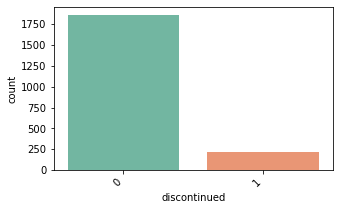

n_discontinued
0            1861
1             221

In [31]:
col_info_by_index(df_eda, 16)

- Feature `discontinued` merupakan feature yang menjelaskan product yang sudah tidak diproduksi lagi.
    - Nilai 0 Menjelaskan Product masih diproduksi
    - Nilai 1 Menjelaskan Product sudah tidak diproduksi
- kita akan mengubah Data yang seblumnya berbentuk kategorikal menjadi numerik

In [32]:
df_eda["discontinued"].replace(0, "No", inplace = True)
df_eda["discontinued"].replace(1, "Yes", inplace = True)

# 5. Data Visualization

In [33]:
df_eda.head()

orderid       customer_companyname                    productname  \
0    10248  Vins et alcools Chevalier                 Queso Cabrales   
1    10248  Vins et alcools Chevalier  Singaporean Hokkien Fried Mee   
2    10248  Vins et alcools Chevalier         Mozzarella di Giovanni   
3    10249          Toms Spezialitten                           Tofu   
4    10249          Toms Spezialitten          Manjimup Dried Apples   

     categoryname                          description  orderdate  \
0  Dairy Products                              Cheeses 1996-07-04   
1  Grains/Cereals  Breads, crackers, pasta, and cereal 1996-07-04   
2  Dairy Products                              Cheeses 1996-07-04   
3         Produce            Dried fruit and bean curd 1996-07-05   
4         Produce            Dried fruit and bean curd 1996-07-05   

  requireddate shippeddate shipcity shipcountry  freight  unitprice  quantity  \
0   1996-08-01  1996-07-16    Reims      France    32.38       14.0        12   
1   1996-08-01  1996-07-16    Reims      France    32.38        9.8        10   
2   1996-08-01  1996-07-16    Reims      France    32.38       34.8         5   
3   1996-08-16  1996-07-10  Munster     Germany    11.61       18.6         9   
4   1996-08-16  1996-07-10  Munster     Germany    11.61       42.4        40   

   unitsinstock  unitsonorder  reorderlevel discontinued ExpeditionService  \
0            22            30            30           No  Federal Shipping   
1            26             0             0          Yes  Federal Shipping   
2            14             0             0           No  Federal Shipping   
3            35             0             0           No    Speedy Express   
4            20             0            10           No    Speedy Express   

                 supplier_companyname supplier_country  
0  Cooperativa de Quesos 'Las Cabras'            Spain  
1                        Leka Trading        Singapore  
2             Formaggi Fortini s.r.l.            Italy  
3                            Mayumi's            Japan  
4                         G'day, Mate        Australia

Selanjutnya kita akan membuat feature baru untuk menunjang analisa lebih lanjut, sebagai berikut :

SalesAmount : `[unitprice * quantity]`

deliver-day1 :  `[requireddate - orderdate]`(Berapa lama waktu yang dibutuhkan setelah customer melakukan pesanan sampai barang datang)

deliver-day2 :  `[shippeddate - orderdate]`(Berapa lama waktu yang dibutuhkan seller untuk mempersiapkan pesanan dan menyerahkan pesanan ke pihak ekspedisi)

deliver-day3 :  `[requireddate - shippeddate]`(Berapa lama waktu yang dibutuhkan oleh ekspedisi untuk mengantarkan barang ke customer)

deliver-daycontrol : `[deliver-day1 - deliver-day2 - deliver-day3]`

In [34]:
df_analysis= df_eda.copy()

In [35]:
df_analysis["SalesAmount"] = df_analysis["unitprice"] * df_analysis["quantity"]
df_analysis["deliver_day1"] = (df_analysis["requireddate"] - df_analysis["orderdate"]).dt.days
df_analysis["deliver_day2"] = (df_analysis["shippeddate"] - df_analysis["orderdate"]).dt.days
df_analysis["deliver_day3"] = (df_analysis["requireddate"] - df_analysis["shippeddate"]).dt.days
df_analysis["deliver_daycontrol"] = (df_analysis["deliver_day1"] - df_analysis["deliver_day2"] - df_analysis["deliver_day3"])

In [36]:
df_analysis.head()

orderid       customer_companyname                    productname  \
0    10248  Vins et alcools Chevalier                 Queso Cabrales   
1    10248  Vins et alcools Chevalier  Singaporean Hokkien Fried Mee   
2    10248  Vins et alcools Chevalier         Mozzarella di Giovanni   
3    10249          Toms Spezialitten                           Tofu   
4    10249          Toms Spezialitten          Manjimup Dried Apples   

     categoryname                          description  orderdate  \
0  Dairy Products                              Cheeses 1996-07-04   
1  Grains/Cereals  Breads, crackers, pasta, and cereal 1996-07-04   
2  Dairy Products                              Cheeses 1996-07-04   
3         Produce            Dried fruit and bean curd 1996-07-05   
4         Produce            Dried fruit and bean curd 1996-07-05   

  requireddate shippeddate shipcity shipcountry  freight  unitprice  quantity  \
0   1996-08-01  1996-07-16    Reims      France    32.38       14.0        12   
1   1996-08-01  1996-07-16    Reims      France    32.38        9.8        10   
2   1996-08-01  1996-07-16    Reims      France    32.38       34.8         5   
3   1996-08-16  1996-07-10  Munster     Germany    11.61       18.6         9   
4   1996-08-16  1996-07-10  Munster     Germany    11.61       42.4        40   

   unitsinstock  unitsonorder  reorderlevel discontinued ExpeditionService  \
0            22            30            30           No  Federal Shipping   
1            26             0             0          Yes  Federal Shipping   
2            14             0             0           No  Federal Shipping   
3            35             0             0           No    Speedy Express   
4            20             0            10           No    Speedy Express   

                 supplier_companyname supplier_country  SalesAmount  \
0  Cooperativa de Quesos 'Las Cabras'            Spain        168.0   
1                        Leka Trading        Singapore         98.0   
2             Formaggi Fortini s.r.l.            Italy        174.0   
3                            Mayumi's            Japan        167.4   
4                         G'day, Mate        Australia       1696.0   

   deliver_day1  deliver_day2  deliver_day3  deliver_daycontrol  
0            28            12            16                   0  
1            28            12            16                   0  
2            28            12            16                   0  
3            42             5            37                   0  
4            42             5            37                   0

## 5.1 Product, Customer, Supplier, Sales Overtime

Kita akan membuat data visualisasi berdasarkan beberapa pertanyaan berikut :

1. Kategori apa yang menjadi best selling product dari NorthwindTraders ?
2. Top 10 Customer ?
3. Top 5 product dari setiap kategori ?
4. 5 product yang terjual paling sedikit ?
5. 10 Supplier paling penting bagi Northwind Traders
6. Bagaimana Bisnis Northwind Traders berjalan?

In [37]:
df_analysis_topic1 = df_analysis[["orderid", "orderdate", "productname", "categoryname", "unitprice", "quantity", "SalesAmount", "customer_companyname", "shipcountry", "supplier_companyname", "supplier_country"]]
df_analysis_topic1

orderid  orderdate                      productname    categoryname  \
0       10248 1996-07-04                   Queso Cabrales  Dairy Products   
1       10248 1996-07-04    Singaporean Hokkien Fried Mee  Grains/Cereals   
2       10248 1996-07-04           Mozzarella di Giovanni  Dairy Products   
3       10249 1996-07-05                             Tofu         Produce   
4       10249 1996-07-05            Manjimup Dried Apples         Produce   
...       ...        ...                              ...             ...   
2103    11066 1998-05-01                          Pavlova     Confections   
2104    11066 1998-05-01       Teatime Chocolate Biscuits     Confections   
2105    11066 1998-05-01                    Sasquatch Ale       Beverages   
2106    11067 1998-05-04  Jack's New England Clam Chowder         Seafood   
2110    11069 1998-05-04                 Chartreuse verte       Beverages   

      unitprice  quantity  SalesAmount       customer_companyname shipcountry  \
0         14.00        12       168.00  Vins et alcools Chevalier      France   
1          9.80        10        98.00  Vins et alcools Chevalier      France   
2         34.80         5       174.00  Vins et alcools Chevalier      France   
3         18.60         9       167.40          Toms Spezialitten     Germany   
4         42.40        40      1696.00          Toms Spezialitten     Germany   
...         ...       ...          ...                        ...         ...   
2103      17.45         3        52.35       White Clover Markets         USA   
2104       9.20        42       386.40       White Clover Markets         USA   
2105      14.00        35       490.00       White Clover Markets         USA   
2106       9.65         9        86.85   Drachenblut Delikatessen     Germany   
2110      18.00        20       360.00        Tortuga Restaurante      Mexico   

                    supplier_companyname supplier_country  
0     Cooperativa de Quesos 'Las Cabras'            Spain  
1                           Leka Trading        Singapore  
2                Formaggi Fortini s.r.l.            Italy  
3                               Mayumi's            Japan  
4                            G'day, Mate        Australia  
...                                  ...              ...  
2103                       Pavlova, Ltd.        Australia  
2104            Specialty Biscuits, Ltd.               UK  
2105                   Bigfoot Breweries              USA  
2106         New England Seafood Cannery              USA  
2110           Aux joyeux ecclsiastiques           France  

[2082 rows x 11 columns]

## Best Selling Categories

<AxesSubplot:xlabel='categoryname', ylabel='count'>

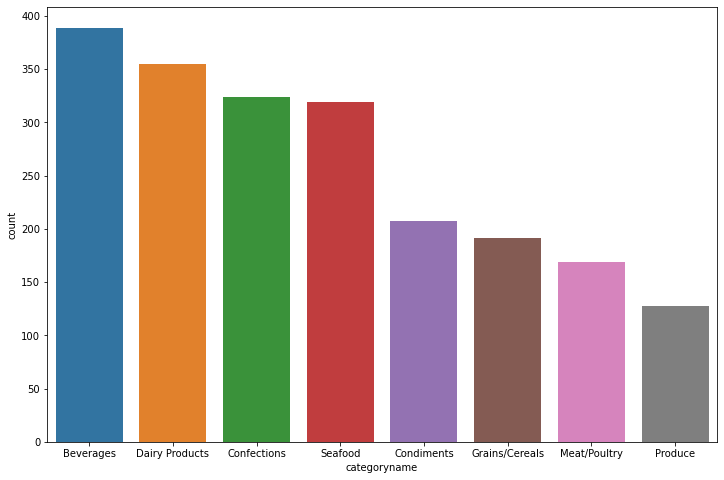

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(x='categoryname', data=df_analysis_topic1,order=df_analysis_topic1['categoryname'].value_counts().index)

**NOTES**

- Berdasarkan grafik diatas penjualan terbanyak merupakan Beverages dan Dairy products
- Beverages, Dairy Products, Confections dan Seafood merupakan product penjualan terbesar dari Northwind Traders.

## Top 5 product from each categories

In [46]:
product_categories = list(df_analysis_topic1["categoryname"].unique())
product_categories

['Dairy Products',
 'Grains/Cereals',
 'Produce',
 'Seafood',
 'Condiments',
 'Confections',
 'Beverages',
 'Meat/Poultry']

Membuat pivot table berdasarkan informasi berikut:
- categoryname
- productname
- quantity, unitprice, salesamount

In [47]:
pivot_product = pd.pivot_table(data = df_analysis_topic1, index = ["categoryname", "productname"], values = ["SalesAmount", "quantity"], aggfunc = "sum")
pivot_product

SalesAmount  quantity
categoryname productname                                 
Beverages    Chai                      13557.60       788
             Chang                     17381.20       995
             Chartreuse verte          13114.80       791
             Cte de Blaye             149984.20       623
             Guaran Fantstica           4647.60      1095
...                                         ...       ...
Seafood      Konbu                      4970.40       847
             Nord-Ost Matjeshering     14671.98       608
             Rd Kaviar                  4170.00       291
             Rogede sild                4740.50       508
             Spegesild                  5712.00       512

[77 rows x 2 columns]

Mengecek productname == Tofu

In [50]:
df_analysis_topic1[df_analysis_topic1["productname"] == "Tofu"]

orderid  orderdate productname categoryname  unitprice  quantity  \
3       10249 1996-07-05        Tofu      Produce      18.60         9   
203     10325 1996-10-09        Tofu      Produce      18.60         9   
226     10333 1996-10-18        Tofu      Produce      18.60        10   
338     10375 1996-12-06        Tofu      Produce      18.60        15   
385     10393 1996-12-25        Tofu      Produce      18.60        42   
431     10409 1997-01-09        Tofu      Produce      18.60        12   
438     10412 1997-01-13        Tofu      Produce      18.60        20   
477     10427 1997-01-27        Tofu      Produce      18.60        35   
600     10474 1997-03-13        Tofu      Produce      18.60        12   
670     10503 1997-04-11        Tofu      Produce      23.25        70   
823     10555 1997-06-02        Tofu      Produce      23.25        30   
862     10571 1997-06-17        Tofu      Produce      23.25        11   
889     10580 1997-06-26        Tofu      Produce      23.25        15   
989     10623 1997-08-07        Tofu      Produce      23.25        21   
997     10625 1997-08-08        Tofu      Produce      23.25         3   
1070    10656 1997-09-04        Tofu      Produce      23.25         3   
1121    10675 1997-09-19        Tofu      Produce      23.25        30   
1279    10733 1997-11-07        Tofu      Produce      23.25        16   
1322    10750 1997-11-21        Tofu      Produce      23.25         5   
1429    10794 1997-12-24        Tofu      Produce      23.25        15   

      SalesAmount                customer_companyname shipcountry  \
3          167.40                   Toms Spezialitten     Germany   
203        167.40                      Kniglich Essen     Germany   
226        186.00                      Wartian Herkku     Finland   
338        279.00          Hungry Coyote Import Store         USA   
385        781.20                  Save-a-lot Markets         USA   
431        223.20                Ocano Atlntico Ltda.   Argentina   
438        372.00                      Wartian Herkku     Finland   
477        651.00                    Piccolo und mehr     Austria   
600        223.20            Pericles Comidas clsicas      Mexico   
670       1627.50        Hungry Owl All-Night Grocers     Ireland   
823        697.50                  Save-a-lot Markets         USA   
862        255.75                        Ernst Handel     Austria   
889        348.75                   Ottilies Kseladen     Germany   
989        488.25                      Frankenversand     Germany   
997         69.75  Ana Trujillo Emparedados y helados      Mexico   
1070        69.75             Great Lakes Food Market         USA   
1121       697.50                      Frankenversand     Germany   
1279       372.00                   Berglunds snabbkp      Sweden   
1322       116.25                      Wartian Herkku     Finland   
1429       348.75                          Que Delcia      Brazil   

     supplier_companyname supplier_country  
3                Mayumi's            Japan  
203              Mayumi's            Japan  
226              Mayumi's            Japan  
338              Mayumi's            Japan  
385              Mayumi's            Japan  
431              Mayumi's            Japan  
438              Mayumi's            Japan  
477              Mayumi's            Japan  
600              Mayumi's            Japan  
670              Mayumi's            Japan  
823              Mayumi's            Japan  
862              Mayumi's            Japan  
889              Mayumi's            Japan  
989              Mayumi's            Japan  
997              Mayumi's            Japan  
1070             Mayumi's            Japan  
1121             Mayumi's            Japan  
1279             Mayumi's            Japan  
1322             Mayumi's            Japan  
1429             Mayumi's            Japan

In [51]:
# Adjust for how much product you want to show, in this case I want 5 top product
# Maybe you want 10, can adjust here.
n_products = 5

# using forloop to loop the available cateogires
# We understand that we have 8 cateogries, make it 4 per rows
pivot_compilation_1 = []
for i in range(0,4):
    # Make an empty list for product price
    product_price = []

    # get pivot table from certain categories, sorted by sales amount & quanity
    pivot_top5product = pivot_product.loc[product_categories[i]].sort_values(by = ["SalesAmount", "quantity"], ascending = False)[:n_products]

    # get product name for the top 5
    top5product = pivot_top5product.index

    # Get price for each product in product catalogue
    for productname in top5product:
        product_price.append(round((products_df[products_df["ProductName"] == productname]["UnitPrice"].values[0]),2))

    pivot_top5product["UnitPrice"] = product_price
    pivot_compilation_1.append(pivot_top5product)
    
display_side_by_side(pivot_compilation_1[0],pivot_compilation_1[1], pivot_compilation_1[2], pivot_compilation_1[3], 
                     titles = [f"Top 5 product of {category}" for category in product_categories[:4]])

Top 5 product of Dairy Products 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Raclette Courdavault 
 76296.0 
 1496 
 55.00 
 
 
 Camembert Pierrot 
 47804.0 
 1504 
 34.00 
 
 
 Mozzarella di Giovanni 
 25738.8 
 806 
 34.80 
 
 
 Gudbrandsdalsost 
 24307.2 
 714 
 36.00 
 
 
 Flotemysost 
 20425.0 
 1036 
 21.50 
 
 
 Top 5 product of Grains/Cereals 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Gnocchi di nonna Alice 
 45121.2 
 1263 
 38.00 
 
 
 Wimmers gute Semmelkndel 
 18620.0 
 608 
 33.25 
 
 
 Singaporean Hokkien Fried Mee 
 9332.4 
 697 
 14.00 
 
 
 Ravioli Angelo 
 7261.8 
 406 
 19.50 
 
 
 Gustaf's Knckebrd 
 7232.4 
 348 
 21.00 
 
 
 Top 5 product of Produce 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Manjimup Dried Apples 
 43470.60 
 862 
 53.00 
 
 
 Rssle Sauerkraut 
 22396.80 
 542 
 45.60 
 
 
 Uncle Bob's Organic Dried Pears 
 21984.00 
 747 
 30.00 
 
 
 Tofu 
 8142.15 
 383 
 23.25 
 
 
 Longlife Tofu 
 2566.00 
 297 
 10.00 
 
 
 Top 5 product of Seafood 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Carnarvon Tigers 
 31987.50 
 539 
 62.50 
 
 
 Ikura 
 22109.20 
 741 
 31.00 
 
 
 Boston Crab Meat 
 19048.30 
 1103 
 18.40 
 
 
 Nord-Ost Matjeshering 
 14671.98 
 608 
 25.89 
 
 
 Inlagd Sill 
 14542.60 
 805 
 19.00

In [52]:
# the second row
pivot_compilation_2 = []
for i in range(4,8):
    # Make an empty list for product price
    product_price = []

    # get pivot table from certain categories, sorted by sales amount & quanity
    pivot_top5product = pivot_product.loc[product_categories[i]].sort_values(by = ["SalesAmount", "quantity"], ascending = False)[:n_products]

    # get product name for the top 5
    top5product = pivot_top5product.index

    # Get price for each product in product catalogue
    for productname in top5product:
        product_price.append(round((products_df[products_df["ProductName"] == productname]["UnitPrice"].values[0]),2))

    pivot_top5product["UnitPrice"] = product_price
    pivot_compilation_2.append(pivot_top5product)
    
display_side_by_side(pivot_compilation_2[0],pivot_compilation_2[1], pivot_compilation_2[2], pivot_compilation_2[3],
                     titles = [f"Top 5 product of {category}" for category in product_categories[4:8]])

Top 5 product of Condiments 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Vegie-spread 
 17696.3 
 445 
 43.90 
 
 
 Sirop d'rable 
 16324.8 
 599 
 28.50 
 
 
 Louisiana Fiery Hot Pepper Sauce 
 14607.0 
 745 
 21.05 
 
 
 Northwoods Cranberry Sauce 
 13680.0 
 370 
 40.00 
 
 
 Gula Malacca 
 10524.2 
 601 
 19.45 
 
 
 Top 5 product of Confections 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Tarte au sucre 
 49827.90 
 1083 
 49.30 
 
 
 Sir Rodney's Marmalade 
 23554.80 
 312 
 81.00 
 
 
 Gumbr Gummibrchen 
 21534.90 
 753 
 31.23 
 
 
 Pavlova 
 17945.35 
 1112 
 17.45 
 
 
 Schoggi Schokolade 
 15231.50 
 365 
 43.90 
 
 
 Top 5 product of Beverages 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Cte de Blaye 
 149984.2 
 623 
 263.50 
 
 
 Ipoh Coffee 
 23423.2 
 544 
 46.00 
 
 
 Chang 
 17381.2 
 995 
 19.00 
 
 
 Lakkalikri 
 16758.0 
 979 
 18.00 
 
 
 Steeleye Stout 
 14104.8 
 859 
 18.00 
 
 
 Top 5 product of Meat/Poultry 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Thringer Rostbratwurst 
 87736.4 
 746 
 123.79 
 
 
 Alice Mutton 
 35014.2 
 966 
 39.00 
 
 
 Perth Pasties 
 21182.2 
 712 
 32.80 
 
 
 Pt chinois 
 19464.0 
 901 
 24.00 
 
 
 Mishi Kobe Niku 
 8827.0 
 95 
 97.00

- Berdasarkan informasi diatas, Top 5 Product berdasarkan kategori dan harga.
- Data diatas digunakan untuk rekomendasi bagi customer.

## 5 Product That Sells The Least

In [53]:
# Adjust for how much product you want to show, in this case I want 5 bottom product
# Maybe you want 10, can adjust here.
n_products = 5

# using forloop to loop the available cateogires
# We understand that we have 8 cateogries, make it 4 per rows
pivot_compilation_1 = []
for i in range(0,4):
    # Make an empty list for product price
    product_price = []

    # get pivot table from certain categories, sorted by sales amount & quanity
    pivot_bottom5product = pivot_product.loc[product_categories[i]].sort_values(by = ["SalesAmount", "quantity"], ascending = True)[:n_products]

    # get product name for the bottom 5
    bottom5product = pivot_bottom5product.index

    # Get price for each product in product catalogue
    for productname in bottom5product:
        product_price.append(round((products_df[products_df["ProductName"] == productname]["UnitPrice"].values[0]),2))

    pivot_bottom5product["UnitPrice"] = product_price
    pivot_compilation_1.append(pivot_bottom5product)
    
display_side_by_side(pivot_compilation_1[0],pivot_compilation_1[1], pivot_compilation_1[2], pivot_compilation_1[3], 
                     titles = [f"Bottom 5 product of {category}" for category in product_categories[:4]])

Bottom 5 product of Dairy Products 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Geitost 
 1651.0 
 730 
 2.50 
 
 
 Mascarpone Fabioli 
 9139.2 
 296 
 32.00 
 
 
 Queso Manchego La Pastora 
 12790.8 
 342 
 38.00 
 
 
 Queso Cabrales 
 13692.0 
 696 
 21.00 
 
 
 Gorgonzola Telino 
 15922.5 
 1377 
 12.50 
 
 
 Bottom 5 product of Grains/Cereals 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Filo Mix 
 3369.8 
 498 
 7.00 
 
 
 Tunnbrd 
 4822.2 
 578 
 9.00 
 
 
 Gustaf's Knckebrd 
 7232.4 
 348 
 21.00 
 
 
 Ravioli Angelo 
 7261.8 
 406 
 19.50 
 
 
 Singaporean Hokkien Fried Mee 
 9332.4 
 697 
 14.00 
 
 
 Bottom 5 product of Produce 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Longlife Tofu 
 2566.00 
 297 
 10.00 
 
 
 Tofu 
 8142.15 
 383 
 23.25 
 
 
 Uncle Bob's Organic Dried Pears 
 21984.00 
 747 
 30.00 
 
 
 Rssle Sauerkraut 
 22396.80 
 542 
 45.60 
 
 
 Manjimup Dried Apples 
 43470.60 
 862 
 53.00 
 
 
 Bottom 5 product of Seafood 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Gravad lax 
 3047.2 
 125 
 26.00 
 
 
 Rd Kaviar 
 4170.0 
 291 
 15.00 
 
 
 Rogede sild 
 4740.5 
 508 
 9.50 
 
 
 Konbu 
 4970.4 
 847 
 6.00 
 
 
 Spegesild 
 5712.0 
 512 
 12.00

In [54]:
# the second row
pivot_compilation_2 = []
for i in range(4,8):
    # Make an empty list for product price
    product_price = []

    # get pivot table from certain categories, sorted by sales amount & quanity
    pivot_bottom5product = pivot_product.loc[product_categories[i]].sort_values(by = ["SalesAmount", "quantity"], ascending = True)[:n_products]

    # get product name for the top 5
    bottom5product = pivot_bottom5product.index

    # Get price for each product in product catalogue
    for productname in bottom5product:
        product_price.append(round((products_df[products_df["ProductName"] == productname]["UnitPrice"].values[0]),2))

    pivot_bottom5product["UnitPrice"] = product_price
    pivot_compilation_2.append(pivot_bottom5product)
    
display_side_by_side(pivot_compilation_2[0],pivot_compilation_2[1], pivot_compilation_2[2], pivot_compilation_2[3],
                     titles = [f"Top 5 product of {category}" for category in product_categories[4:8]])

Top 5 product of Condiments 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Genen Shouyu 
 1813.50 
 122 
 15.50 
 
 
 Aniseed Syrup 
 3040.00 
 324 
 10.00 
 
 
 Louisiana Hot Spiced Okra 
 3502.00 
 238 
 17.00 
 
 
 Chef Anton's Gumbo Mix 
 5801.15 
 298 
 21.35 
 
 
 Grandma's Boysenberry Spread 
 6820.00 
 280 
 25.00 
 
 
 Top 5 product of Confections 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Chocolade 
 1542.75 
 138 
 12.75 
 
 
 Valkoinen suklaa 
 3152.50 
 213 
 16.25 
 
 
 NuNuCa Nu-Nougat-Creme 
 4051.60 
 318 
 14.00 
 
 
 Zaanse koeken 
 4358.60 
 485 
 9.50 
 
 
 Teatime Chocolate Biscuits 
 6067.50 
 713 
 9.20 
 
 
 Top 5 product of Beverages 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Laughing Lumberjack Lager 
 2282.00 
 164 
 14.00 
 
 
 Guaran Fantstica 
 4647.60 
 1095 
 4.50 
 
 
 Sasquatch Ale 
 5418.00 
 416 
 14.00 
 
 
 Rhnbru Klosterbier 
 8619.55 
 1151 
 7.75 
 
 
 Outback Lager 
 11292.00 
 805 
 15.00 
 
 
 Top 5 product of Meat/Poultry 
 
 
 
 SalesAmount 
 quantity 
 UnitPrice 
 
 
 productname 
 
 
 
 
 
 
 
 Tourtire 
 4972.0 
 735 
 7.45 
 
 
 Mishi Kobe Niku 
 8827.0 
 95 
 97.00 
 
 
 Pt chinois 
 19464.0 
 901 
 24.00 
 
 
 Perth Pasties 
 21182.2 
 712 
 32.80 
 
 
 Alice Mutton 
 35014.2 
 966 
 39.00

## 10 Most Important Supplier

<AxesSubplot:xlabel='supplier_companyname', ylabel='SalesAmount'>

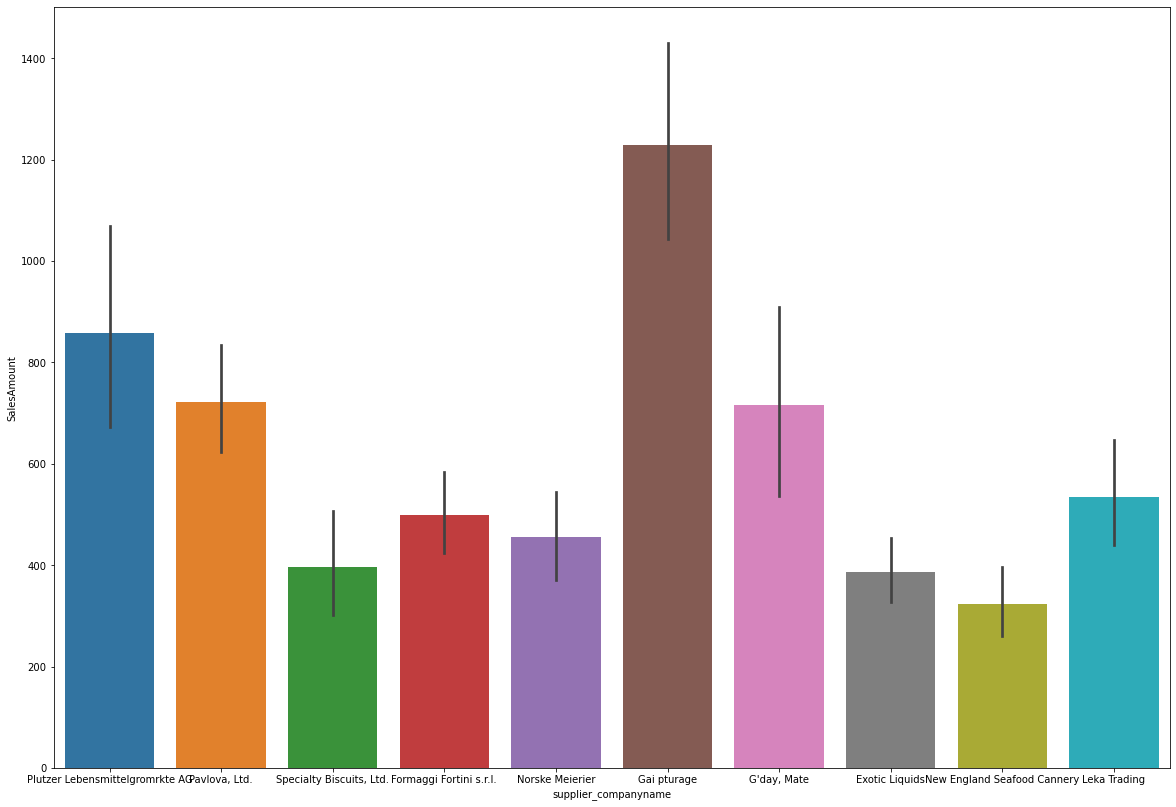

In [80]:
plt.figure(figsize=(20,14))
sns.barplot(x='supplier_companyname', y='SalesAmount',data=df_analysis_topic1,order=df_analysis_topic1['supplier_companyname'].value_counts().head(10).index)

**NOTES**

- Dari Data diatas didapat 4 Supplier mensuplai penjualan Northwinds Trader hingga 40%

## How's Business in Northwind Traders

**NOTES**

- Business mengalami peningkatan Sejak July 1996 - November 1997.
- Dari November 1997 sampai April 1998, terjadi peningkatan Sales. Diperkirakan Peningkatan terjadi karena Christmas dan liburan akhir tahun

## 5.2. Shipment Analysis

Saya akan membuat pertanyaan berdasarkan pertanyan berikut:

1. Expedition Service yang paling Popuplar ?
2. Days : 
    - Berapa lama waktu yang dibutuhkan setelah customer melakukan pesanan sampai barang datang
    - Berapa lama waktu yang dibutuhkan seller untuk mempersiapkan pesanan dan menyerahkan pesanan ke pihak ekspedisi
    - Berapa lama waktu yang dibutuhkan oleh ekspedisi untuk mengantarkan barang ke customer

In [83]:
df_analysis.head()

orderid       customer_companyname                    productname  \
0    10248  Vins et alcools Chevalier                 Queso Cabrales   
1    10248  Vins et alcools Chevalier  Singaporean Hokkien Fried Mee   
2    10248  Vins et alcools Chevalier         Mozzarella di Giovanni   
3    10249          Toms Spezialitten                           Tofu   
4    10249          Toms Spezialitten          Manjimup Dried Apples   

     categoryname                          description  orderdate  \
0  Dairy Products                              Cheeses 1996-07-04   
1  Grains/Cereals  Breads, crackers, pasta, and cereal 1996-07-04   
2  Dairy Products                              Cheeses 1996-07-04   
3         Produce            Dried fruit and bean curd 1996-07-05   
4         Produce            Dried fruit and bean curd 1996-07-05   

  requireddate shippeddate shipcity shipcountry  freight  unitprice  quantity  \
0   1996-08-01  1996-07-16    Reims      France    32.38       14.0        12   
1   1996-08-01  1996-07-16    Reims      France    32.38        9.8        10   
2   1996-08-01  1996-07-16    Reims      France    32.38       34.8         5   
3   1996-08-16  1996-07-10  Munster     Germany    11.61       18.6         9   
4   1996-08-16  1996-07-10  Munster     Germany    11.61       42.4        40   

   unitsinstock  unitsonorder  reorderlevel discontinued ExpeditionService  \
0            22            30            30           No  Federal Shipping   
1            26             0             0          Yes  Federal Shipping   
2            14             0             0           No  Federal Shipping   
3            35             0             0           No    Speedy Express   
4            20             0            10           No    Speedy Express   

                 supplier_companyname supplier_country  SalesAmount  \
0  Cooperativa de Quesos 'Las Cabras'            Spain        168.0   
1                        Leka Trading        Singapore         98.0   
2             Formaggi Fortini s.r.l.            Italy        174.0   
3                            Mayumi's            Japan        167.4   
4                         G'day, Mate        Australia       1696.0   

   deliver_day1  deliver_day2  deliver_day3  deliver_daycontrol  
0            28            12            16                   0  
1            28            12            16                   0  
2            28            12            16                   0  
3            42             5            37                   0  
4            42             5            37                   0

In [84]:
# copy the dataframe first so we can go back if needed
df2_topic2 = df_analysis.copy()

# delete duplicate orderid
df2_topic2.drop_duplicates(subset = ["orderid"], inplace = True)

# We use feature that we will use for this topic only
df2_topic2 = df2_topic2[["orderid", "deliver_day1", "deliver_day2", "deliver_day3", "ExpeditionService"]]

df2_topic2

orderid  deliver_day1  deliver_day2  deliver_day3 ExpeditionService
0       10248            28            12            16  Federal Shipping
3       10249            42             5            37    Speedy Express
5       10250            28             4            24    United Package
8       10251            28             7            21    Speedy Express
11      10252            28             2            26    United Package
...       ...           ...           ...           ...               ...
2093    11063            28             6            22    United Package
2096    11064            28             3            25    Speedy Express
2103    11066            28             3            25    United Package
2106    11067            14             2            12    United Package
2110    11069            28             2            26    United Package

[809 rows x 5 columns]

## Most Used Expedition Service

<AxesSubplot:xlabel='ExpeditionService', ylabel='count'>

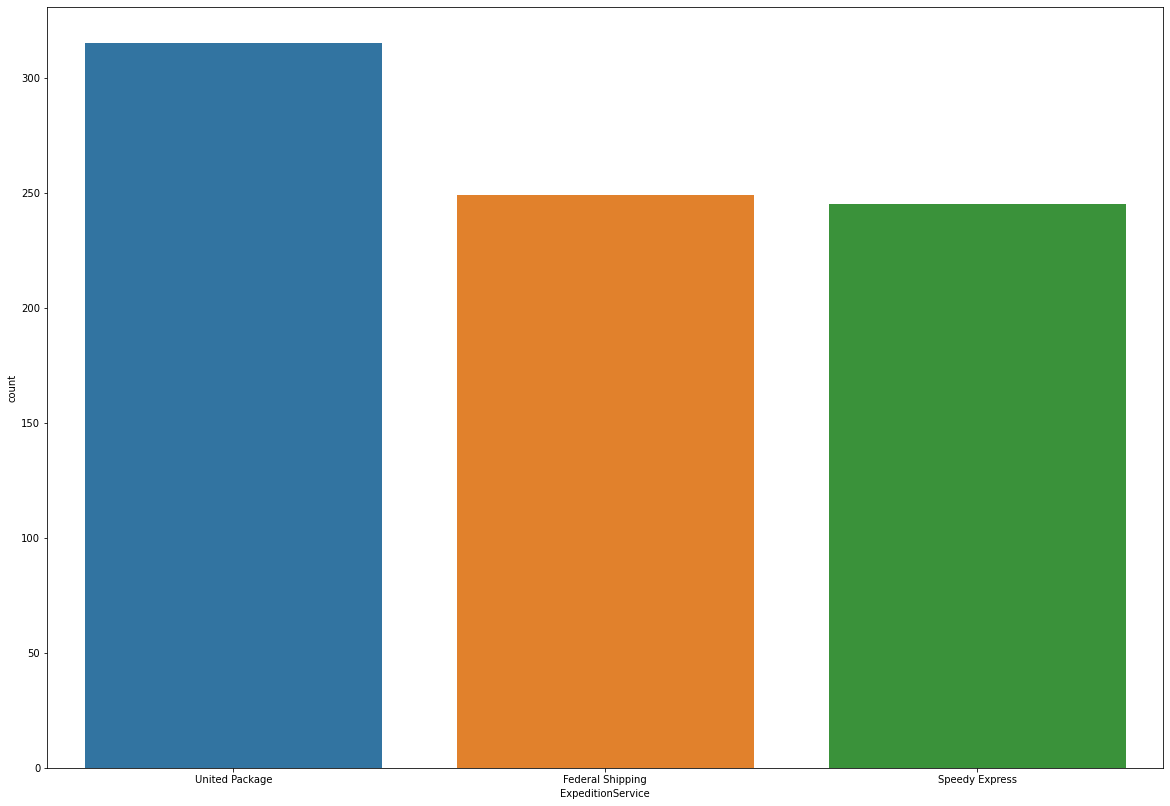

In [88]:
plt.figure(figsize=(20,14))
sns.countplot(x='ExpeditionService',data=df2_topic2,order=df2_topic2['ExpeditionService'].value_counts().head(10).index)

- Berdasarkan Tabel diatas didapat Expedition Service yang paling sering digunakan adalah United Package dengan market share sebesar 38%.

### Shipment Days Analysis

Berikut Merupakan Variabel yang akan kita analisis:

SalesAmount : `[unitprice * quantity]`

deliver-day1 :  `[requireddate - orderdate]`(Berapa lama waktu yang dibutuhkan setelah customer melakukan pesanan sampai barang datang)

deliver-day2 :  `[shippeddate - orderdate]`(Berapa lama waktu yang dibutuhkan seller untuk mempersiapkan pesanan dan menyerahkan pesanan ke pihak ekspedisi)

deliver-day3 :  `[requireddate - shippeddate]`(Berapa lama waktu yang dibutuhkan oleh ekspedisi untuk mengantarkan barang ke customer)

deliver-daycontrol : `[deliver-day1 - deliver-day2 - deliver-day3]`

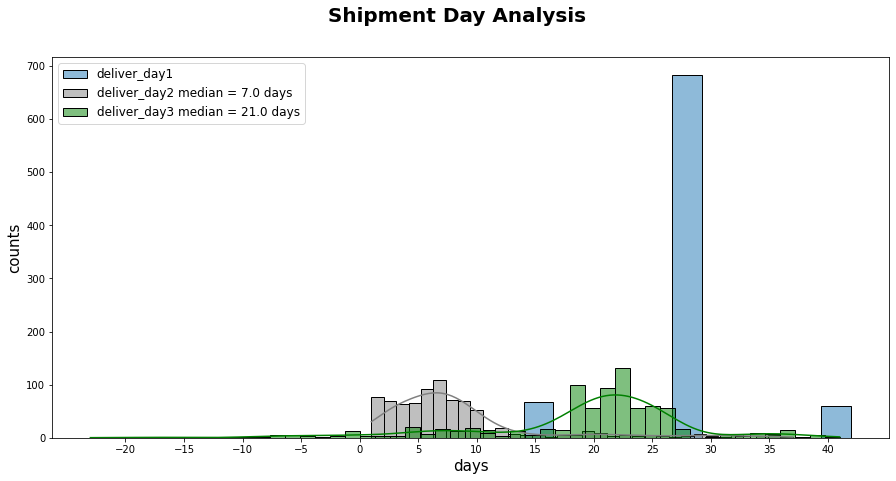

In [85]:
plt.figure(figsize = (15,7))
sns.histplot(data = df2_topic2, x = "deliver_day1", alpha = 0.5, label = "deliver_day1")
sns.histplot(data = df2_topic2, x = "deliver_day2", color = "grey", alpha = 0.5, kde = True, fill = True, label = f"deliver_day2 median = {df2_topic2['deliver_day2'].median()} days")
sns.histplot(data = df2_topic2, x = "deliver_day3", color = "green", alpha = 0.5, kde = True, fill = True, label = f"deliver_day3 median = {df2_topic2['deliver_day3'].median()} days")
plt.xticks(ticks = [-20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
plt.xlabel("days", fontsize = 15)
plt.ylabel("counts", fontsize = 15)
plt.suptitle("Shipment Day Analysis", fontsize = 20, weight = "bold")
plt.legend(loc = "upper left", fontsize = 12)
plt.show()

**NOTES**

Dari Grafik diatas, dapat dilihat distribusi sebagai berikut.

deliver-day1 menjelaskan bahwa barang membutuhkan (7, 28,42) days setelah customer melakukan pesanan sampai barang datang

deliver-day2 menjelaskan bahwa barang membutuhkan 7 days bagi seller untuk mempersiapkan pesanan dan menyerahkan pesanan ke pihak ekspedisi

deliver-day3 : menjelaskan bahwa barang membutuhkan 21 days oleh ekspedisi untuk mengantarkan barang ke customer

Sekarang kita akan melihat perbandingan dari setiap ekspedisi.

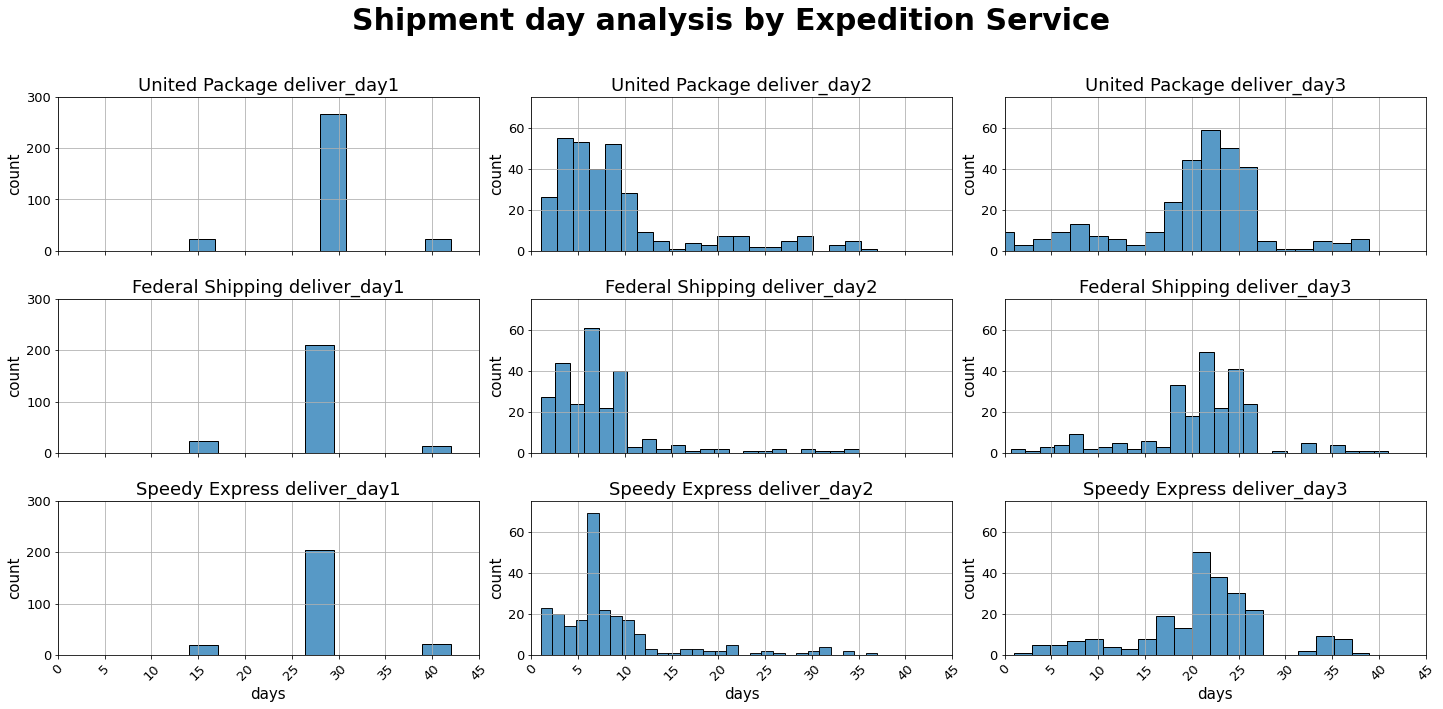

In [89]:
expedition_service_days = {
    "United Package deliver_day1" : df2_topic2[df2_topic2["ExpeditionService"] == "United Package"]["deliver_day1"],
    "United Package deliver_day2" : df2_topic2[df2_topic2["ExpeditionService"] == "United Package"]["deliver_day2"],
    "United Package deliver_day3" : df2_topic2[df2_topic2["ExpeditionService"] == "United Package"]["deliver_day3"],
    "Federal Shipping deliver_day1" : df2_topic2[df2_topic2["ExpeditionService"] == "Federal Shipping"]["deliver_day1"],
    "Federal Shipping deliver_day2" : df2_topic2[df2_topic2["ExpeditionService"] == "Federal Shipping"]["deliver_day2"],
    "Federal Shipping deliver_day3" : df2_topic2[df2_topic2["ExpeditionService"] == "Federal Shipping"]["deliver_day3"],
    "Speedy Express deliver_day1" : df2_topic2[df2_topic2["ExpeditionService"] == "Speedy Express"]["deliver_day1"],
    "Speedy Express deliver_day2" : df2_topic2[df2_topic2["ExpeditionService"] == "Speedy Express"]["deliver_day2"],
    "Speedy Express deliver_day3" : df2_topic2[df2_topic2["ExpeditionService"] == "Speedy Express"]["deliver_day3"],
}

# Plot metrics
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10), sharex = True)

# rows = i
# cols = j

# for ax identity
i, j = 0, 0

for title, day_data in expedition_service_days.items():
    
    # Create Ax
    ax = axs[i, j]
    
    if j == 0:
        ax.set_ylim(0, 300)
    else : 
        ax.set_ylim(0, 75)

    # Create the graph    
    ax = sns.histplot(data = day_data, ax = ax)
    
    # graph complimentary 
    ax.set_title(title, size = 18)
    ax.set_ylabel("count", size = 15)
    ax.set_xlabel("days", size = 15)
    ax.tick_params(axis = "both", labelsize = 13)
    ax.tick_params(axis = "x", rotation = 45)
    ax.set_xlim(0, 45)
    ax.grid()
    
    
    # Incrementing the index
    # adjust the j (cols) only. if you want 2 cols then j == 2
    j += 1
    if j == 3:
        j = 0
        i += 1

fig.suptitle('Shipment day analysis by Expedition Service\n', fontsize = 30, weight = 'bold', x = 0.51)
plt.tight_layout(h_pad = 2, w_pad = 1)
plt.show()

**NOTES**

- Berdasarkan informasi diatas deliver-day1 dan deliver-day2 tidak mencerminkan performa dari ekspedisi.
- kita dapat menggunakan deliver-day3 untuk melihat performa pengiriman dari Expedition service.
- United Package deliver-day3 memiliki data yang lebih baik karena memiliki jumlah pesanan jika dibandingkan dengan pesaingnya.